In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install pandas openpyxl xlrd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_excel('/content/drive/My Drive/jul-22.xlsx')
df2 = pd.read_excel('/content/drive/My Drive/nov-22.xlsx')
df3 = pd.read_excel('/content/drive/My Drive/feb-23.xlsx')

In [ ]:
data = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

In [ ]:
data.head()

,co_id,activation_date,total_nb_recharge,total_rechage,total_u_data,total_rev_option,total_rev_sos,total_u_out,total_u_in,usage_op1,...,usage_op3,nb_cont_out,nb_cont_in,nb_cell_visite_out,nb_cell_visite_in,entity_code,entity_type_name,nbr_contrat,nbr_actif,flag_churn
0,36799963.0,2022-07-20 19:45:16,2.0,1.878,1.089560e+07,0.756302,NaN,14.950,0.633,NaN,...,1.250,10.0,4.0,6.0,5.0,TRA016,AGENCE TRADE,13.0,NaN,0.0
1,36800104.0,2022-07-20 10:39:24,1.0,0.878,9.520800e+06,NaN,NaN,14.983,17.617,NaN,...,13.383,12.0,13.0,4.0,10.0,TRA016,AGENCE TRADE,23.0,3.0,1.0
2,34763697.0,2022-07-06 13:27:15,25.0,28.386,8.024546e+06,11.428571,NaN,240.100,86.034,NaN,...,26.900,69.0,56.0,22.0,28.0,TRA065,AGENCE TRADE,24.0,5.0,0.0
3,36822172.0,2022-07-17 11:47:54,1.0,0.878,6.366023e+06,NaN,NaN,13.083,4.183,NaN,...,NaN,5.0,5.0,4.0,6.0,TRA035,AGENCE TRADE,56.0,7.0,0.0
4,34745291.0,2022-07-04 11:13:53,1.0,4.386,2.587891e-01,NaN,NaN,1.967,5.784,NaN,...,NaN,2.0,11.0,1.0,7.0,TUN0331,AGENCE TRADE,2.0,6.0,0.0


In [ ]:
#data.to_excel('donnees_combinees.xlsx', index=False)

# Analyse des données
## 1. Analyse univariée

### 1.1 Préparation des données

In [ ]:
#Vérification de la taille du dataset
data.shape

(708908, 21)

In [ ]:
#Vérification des types de données et des valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708908 entries, 0 to 708907
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   co_id               708907 non-null  float64
 1   activation_date     708907 non-null  object 
 2   total_nb_recharge   629555 non-null  float64
 3   total_rechage       629555 non-null  float64
 4   total_u_data        581693 non-null  float64
 5   total_rev_option    390189 non-null  float64
 6   total_rev_sos       1330 non-null    float64
 7   total_u_out         670271 non-null  float64
 8   total_u_in          491100 non-null  float64
 9   usage_op1           3261 non-null    float64
 10  usage_op2           42161 non-null   float64
 11  usage_op3           433353 non-null  float64
 12  nb_cont_out         665887 non-null  float64
 13  nb_cont_in          673766 non-null  float64
 14  nb_cell_visite_out  665887 non-null  float64
 15  nb_cell_visite_in   673766 non-nul

In [ ]:
data_copy= data.copy(deep=True)

### 1.1.1. Identification des doublons

In [ ]:
#Vérification des doublons
data_copy.duplicated().sum()

3

In [ ]:
#Suppression des doublons
data_copy.drop_duplicates(inplace=True)
print(f"Nombre de lignes après suppression des doublons : {data_copy.shape[0]}")

Nombre de lignes après suppression des doublons : 708905


### 1.1.2. Gestion des valeurs manquantes

In [ ]:
data_copy.isnull().sum()

,0
co_id,1
activation_date,1
total_nb_recharge,79353
total_rechage,79353
total_u_data,127214
total_rev_option,318717
total_rev_sos,707575
total_u_out,38637
total_u_in,217807
usage_op1,705644


In [ ]:
# Pourcentage de valeurs manquantes par colonne
missing_percentage = data_copy.isnull().mean() * 100
print(missing_percentage)

co_id                  0.000141
activation_date        0.000141
total_nb_recharge     11.193742
total_rechage         11.193742
total_u_data          17.945141
total_rev_option      44.959057
total_rev_sos         99.812387
total_u_out            5.450237
total_u_in            30.724427
usage_op1             99.539995
usage_op2             94.052659
usage_op3             38.870512
nb_cont_out            6.068514
nb_cont_in             4.957082
nb_cell_visite_out     6.068514
nb_cell_visite_in      4.957082
entity_code            1.788533
entity_type_name       1.788533
nbr_contrat            1.600638
nbr_actif              1.600638
flag_churn             0.000141
dtype: float64


In [ ]:
#Suppression des colonnes avec plus de 90% de valeurs manquantes car elles apportent peu d'informations exploitables
data_copy.drop(["total_rev_sos","usage_op1","usage_op2","usage_op3","total_rev_option"], axis=1, inplace=True)

In [ ]:
data.isna().mean()*100

,0
co_id,0.000141
activation_date,0.000141
total_nb_recharge,11.193695
total_rechage,11.193695
total_u_data,17.945206
total_rev_option,44.959148
total_rev_sos,99.812388
total_u_out,5.450214
total_u_in,30.724438
usage_op1,99.539997


In [ ]:
#Suppression de la colonne co_id
data_copy.drop(columns=['co_id'], inplace=True)

In [ ]:
#Remplissage des valeurs manquantes des colonnes catégoriques par le mode :
for col in ['entity_code', 'entity_type_name']:
    data_copy[col].fillna(data_copy[col].mode()[0], inplace=True)

<ipython-input-88-e78bdb12f3c2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy[col].fillna(data_copy[col].mode()[0], inplace=True)


In [ ]:
# Suppression de la ligne avec NaN dans activation_date et flag_churn
data_copy.drop(data_copy[
                         (data_copy['activation_date'].isna()) &
                         (data_copy['flag_churn'].isna())].index, inplace=True)


**Stratégie pour gérer les NaN**

Diviser les colonnes en deux catégories

•	Colonnes représentant des activités mesurables :
**total_nb_recharge, total_rechage, total_u_data, total_u_out, total_u_in, total_rev_option, usage_op3, nb_cont_out, nb_cont_in, nb_cell_visite_out, nb_cell_visite_in.**

**Hypothèse** : Un NaN indique potentiellement une absence d'activité. Nous remplaçons les NaN par 0.


•	Colonnes représentant des états ou des comptes :
**nbr_contrat, nbr_actif**.

**Hypothèse** : Un NaN ici peut indiquer un manque d'information ou une inactivité. Nous pouvons remplacer par 0 si cela semble logique ou par une valeur indicative comme la moyenne ou la médiane.


In [ ]:
# Liste des colonnes représentant des activités mesurables
colonnes_activites = [
    'total_nb_recharge', 'total_rechage', 'total_u_data', 'total_u_out', 'total_u_in',
    'nb_cont_out', 'nb_cont_in',
    'nb_cell_visite_out', 'nb_cell_visite_in'
]

# Remplacer les NaN des colonnes d'activités par 0
for col in colonnes_activites:
    data_copy[col] = data_copy[col].fillna(0)

In [ ]:
# Liste des colonnes représentant des états ou des comptes
colonnes_etats = ['nbr_contrat', 'nbr_actif']

# Extraire le mois de la colonne 'activation_date'
data_copy['mois_activation'] = pd.to_datetime(data_copy['activation_date']).dt.month

# Pré-calculer la médiane mensuelle pour chaque colonne d'état
medians_by_month = data_copy.groupby('mois_activation')[colonnes_etats].median()

# Appliquer les médianes par mois pour remplir les NaN
for col in colonnes_etats:
    data_copy[col] = data_copy.apply(
        lambda row: row[col] if pd.notna(row[col]) else medians_by_month.loc[row['mois_activation'], col],
        axis=1
    )



In [ ]:
# Supprimer la colonne mois_activation
data_copy.drop(columns=['mois_activation'], inplace=True)

In [ ]:
data_copy.isnull().sum()

,0
co_id,0
activation_date,0
total_nb_recharge,0
total_rechage,0
total_u_data,0
total_u_out,0
total_u_in,0
nb_cont_out,0
nb_cont_in,0
nb_cell_visite_out,0


In [ ]:
data_copy.shape

(708904, 16)

### 1.1.3. Gestion des valeurs aberrantes

In [ ]:
# Conversion de la colonne 'activation_date' en type datetime
data_copy['activation_date'] = pd.to_datetime(data_copy['activation_date'], errors='coerce')

# Vérification du type après conversion
print(data_copy['activation_date'].dtype)


datetime64[ns]


In [ ]:
data_copy['entity_code'].unique()

array(['TRA016', 'TRA065', 'TRA035', ..., 'TUN0402', 'TUNKRA10',
       'ZAG0033'], dtype=object)

In [ ]:
data_copy['entity_code'] = data_copy['entity_code'].str[:3]

# Vérifier les catégories uniques dans 'entity_type_name' après modification
print(data_copy['entity_code'].unique())

['TRA' 'TUN' 'JEN' 'KAR' 'HBO' 'MON' 'KAI' 'SOU' 'AZU' 'BIZ' 'LAC' 'NAB'
 'MEH' 'MSK' 'VIP' 'GAB' 'SFA' 'SID' 'KEF' 'TAD' 'KSH' 'SDH' 'FAL' 'GHA'
 'MOK' 'KAS' 'BEJ' 'BEA' 'AOU' 'LAF' 'MAN' 'ARI' 'MED' 'JER' 'FKK' 'SFX'
 'MAH' 'SDB' 'GAF' 'BEN' 'CTR' 'MRV' 'ENN' 'SSE' 'KRA' 'SLI' 'SAH' 'KOR'
 'KEB' 'FKP' 'DIS' 'TAT' 'ZAG' 'MJ4' 'ZAH' 'ZAR' 'TOZ' 'ELM' 'MN3' 'KLB'
 'SF5' 'HAM' 'MJ1' 'MN6' 'MAT' 'BL1' 'BNA' 'GUE' 'DHC' 'Pro' 'AGP' '47'
 'SIL' 'EBU' 'DFI' '2' 'MAR' 'FOU' 'D02' 'D04' 'D07']


In [ ]:
data_copy['entity_type_name'].unique()

array(['AGENCE TRADE', 'INDIRECT', 'BOUTIQUE', 'LAB2.0', 'FRANCHISE',
       'CONVENTION RAYEN', 'TRAVEL RETAIL', 'PRO', 'AUTRES BOUTIQUES',
       'CONVENTION', 'AUTRES'], dtype=object)

Détection visuelle des outliers :

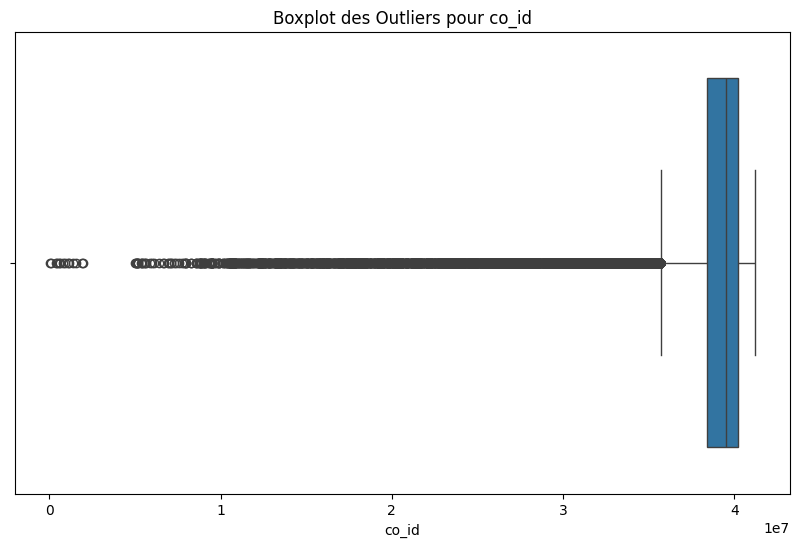

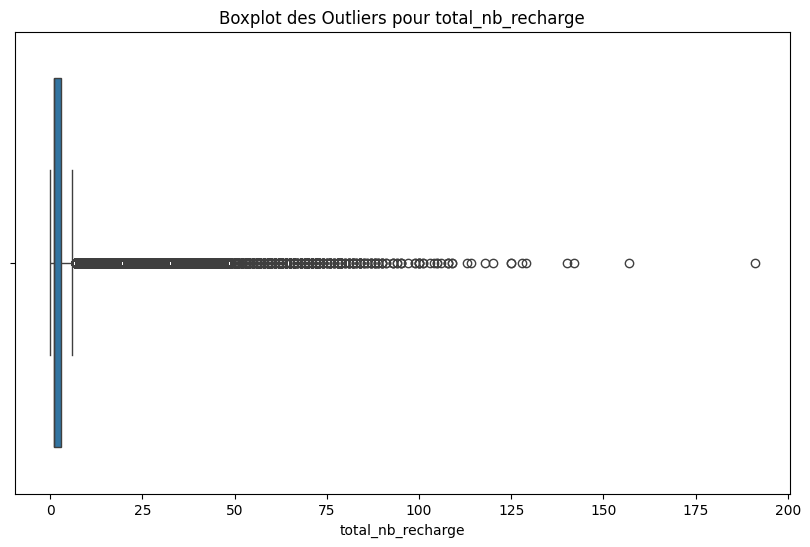

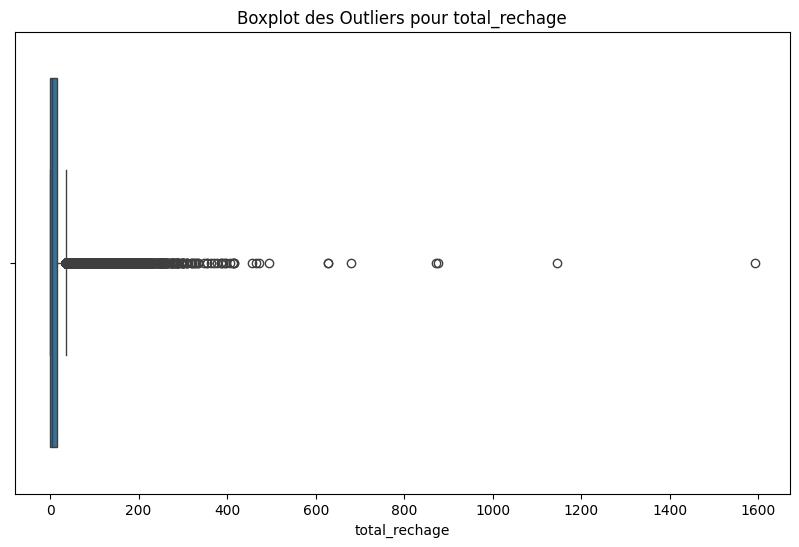

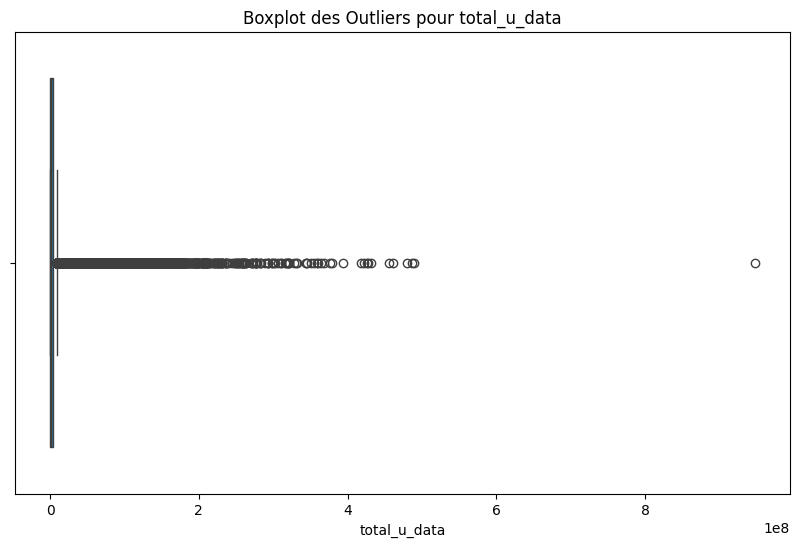

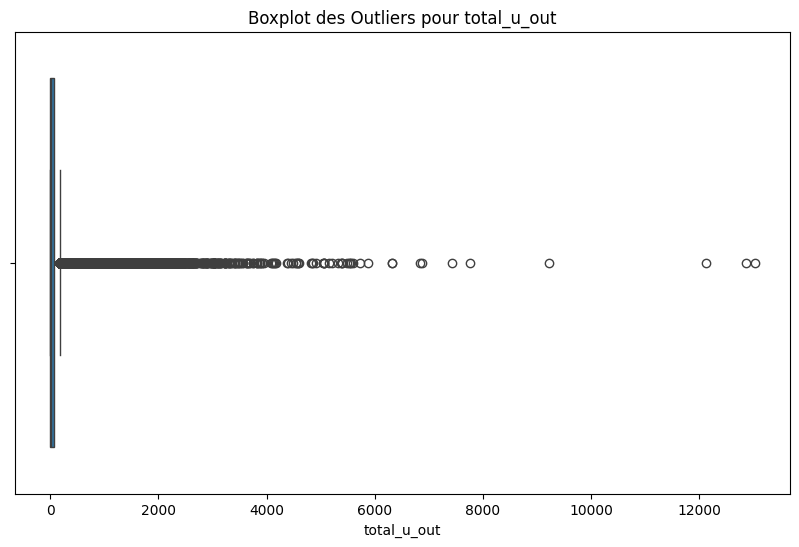

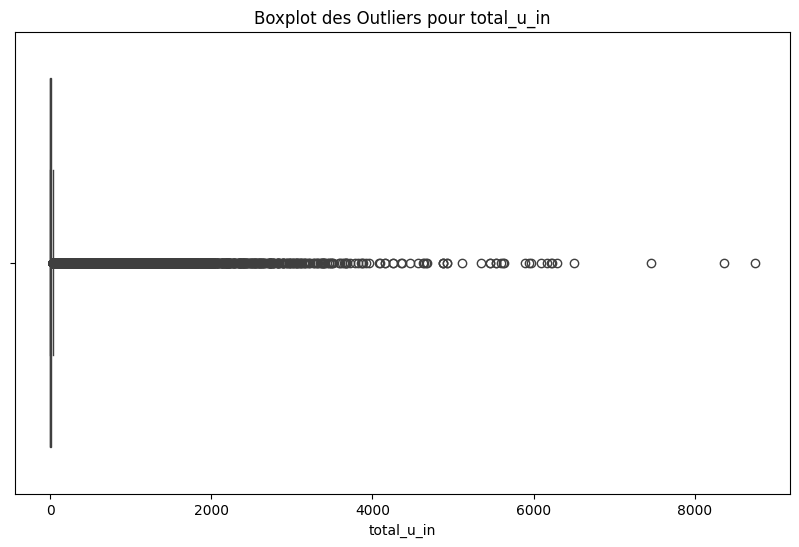

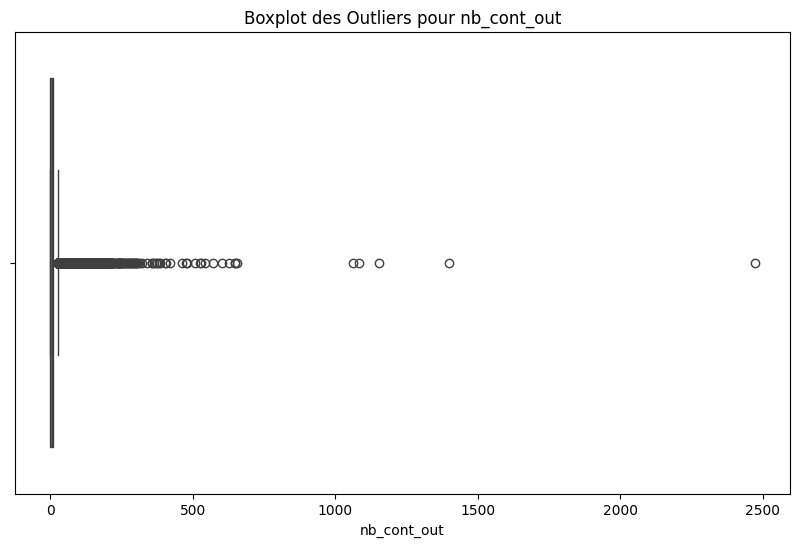

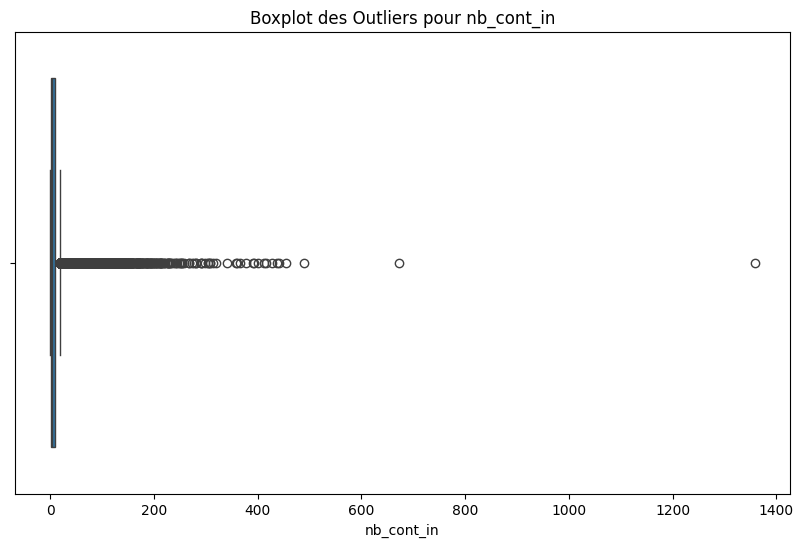

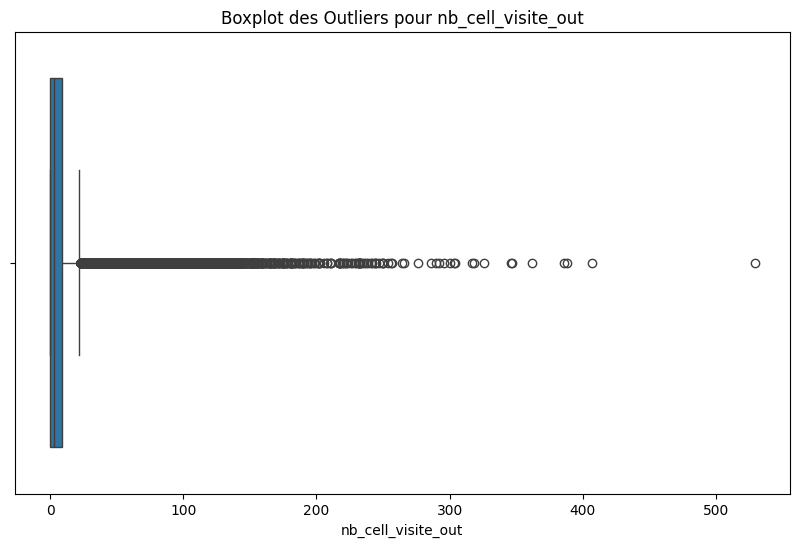

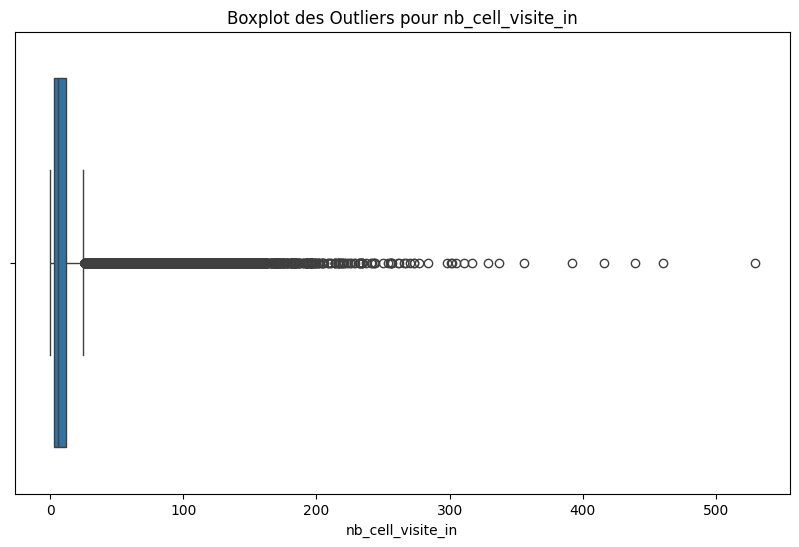

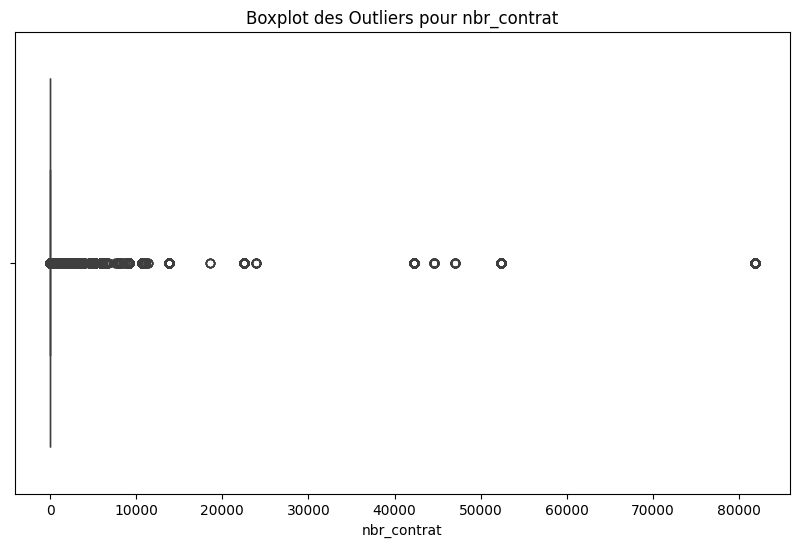

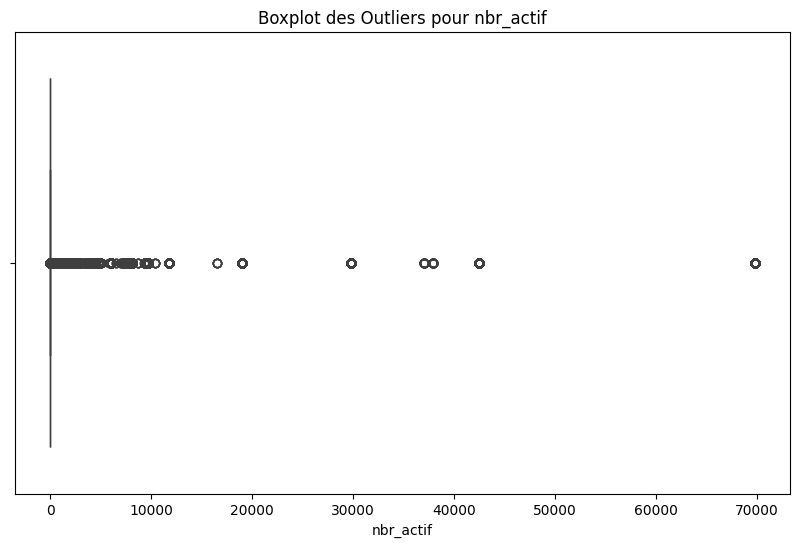

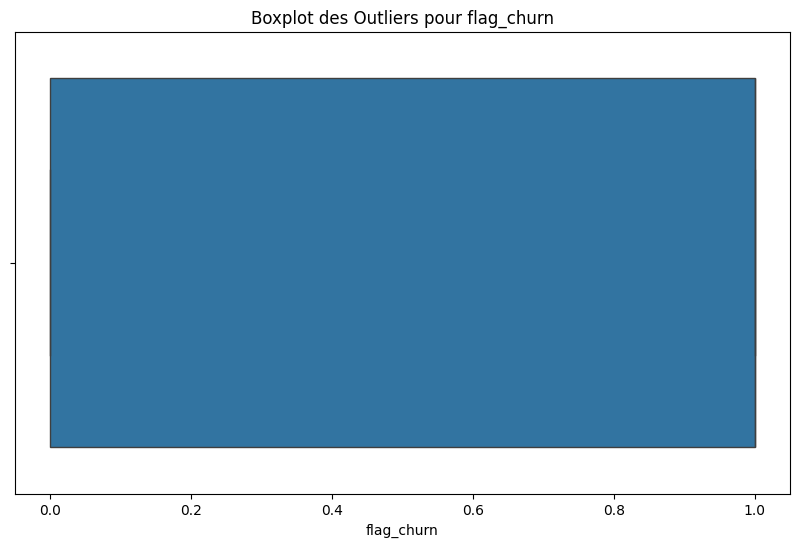

In [ ]:
def plot_individual_boxplots(df):
    # Sélectionner uniquement les colonnes continues (numériques)
    df_continuous = df.select_dtypes(include=['float64', 'int64'])

    # Créer un boxplot pour chaque variable continue
    for column in df_continuous.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f'Boxplot des Outliers pour {column}')
        plt.show()

# Appeler la fonction sur votre DataFrame (data_copy par exemple)
plot_individual_boxplots(data_copy)

In [ ]:
data_copy.to_csv("data_pour_BD.csv", index=False)

Détection des outliers avec IQR :

In [ ]:
# Fonction pour détecter les outliers avec IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        # Calcul de Q1 (25e percentile) et Q3 (75e percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calcul des limites inférieure et supérieure
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Détection des outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Appliquer la fonction sur les variables continues
columns_continues = ['total_nb_recharge', 'total_rechage', 'total_u_data', 'total_u_out', 'total_u_in',
                     'nb_cont_out', 'nb_cont_in',
                     'nb_cell_visite_out', 'nb_cell_visite_in', 'nbr_contrat', 'nbr_actif']
outliers_iqr = detect_outliers_iqr(data_copy, columns_continues)

# Affichage des outliers détectés
for column, outlier_data in outliers_iqr.items():
    print(f"Outliers dans {column}:")
    print(outlier_data)
    print("\n")


Outliers dans total_nb_recharge:
           activation_date  total_nb_recharge  total_rechage  total_u_data  \
2      2022-07-06 13:27:15               25.0      28.386000  8.024546e+06   
17     2022-07-05 20:14:37                9.0       9.000000  1.118932e+06   
28     2022-07-14 22:09:11               10.0      37.930001  1.923812e+07   
54     2022-07-23 09:23:44               10.0      10.000000  0.000000e+00   
79     2022-07-19 09:17:03                7.0       6.878000  2.058240e+06   
...                    ...                ...            ...           ...   
708766 2023-02-06 10:33:26                9.0      48.000000  1.802091e+07   
708784 2023-02-06 15:32:13                8.0     145.000000  1.077734e+08   
708789 2023-02-16 11:01:09               10.0      55.000000  1.868974e+07   
708830 2023-02-03 11:01:35               19.0      22.400000  4.179539e+06   
708880 2023-02-14 16:54:14               14.0      14.000000  3.351376e+06   

        total_u_out  total_u_i

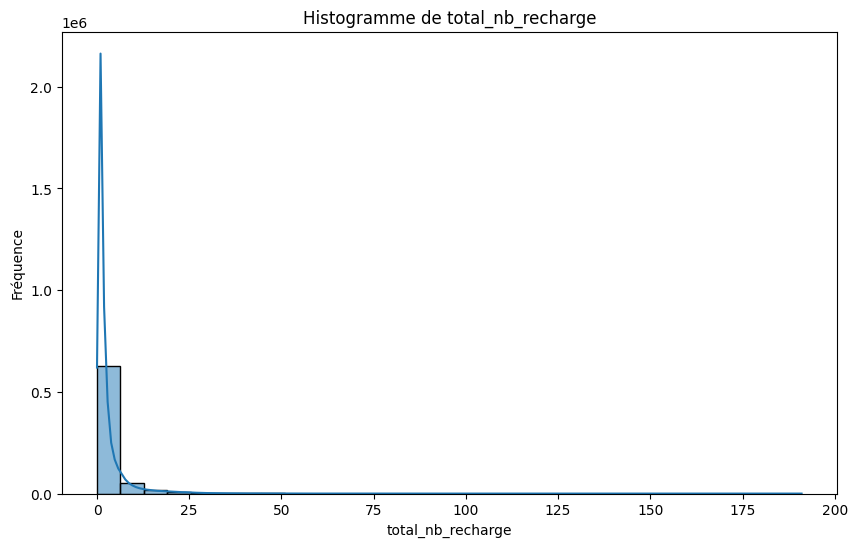

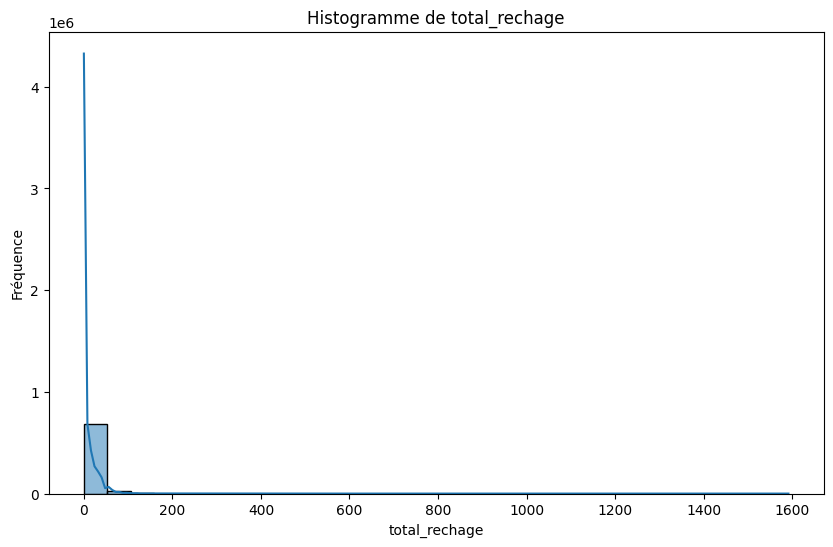

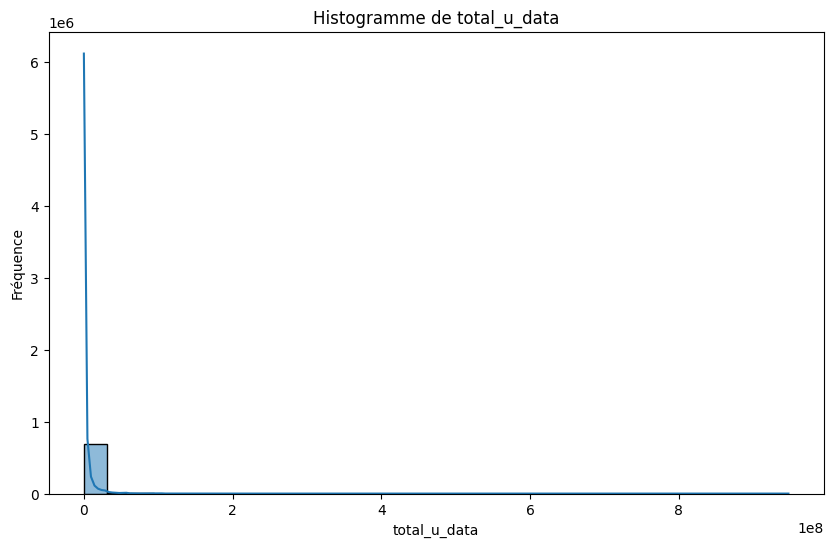

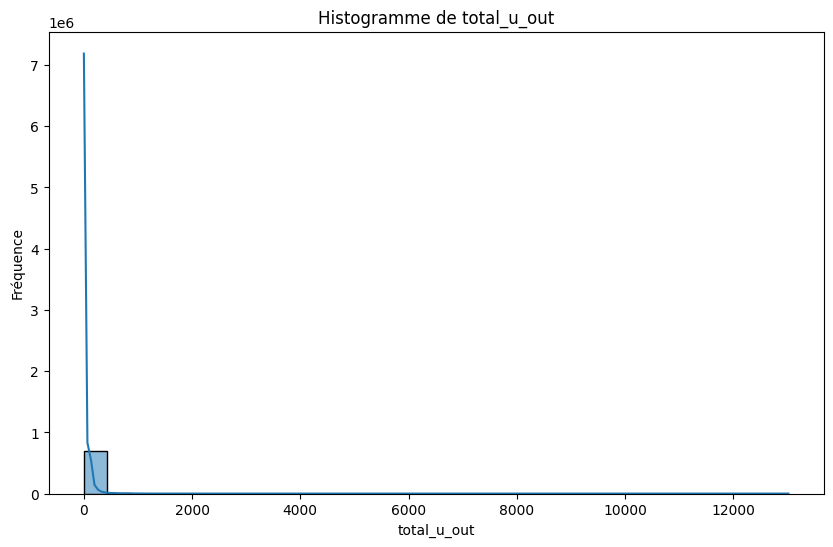

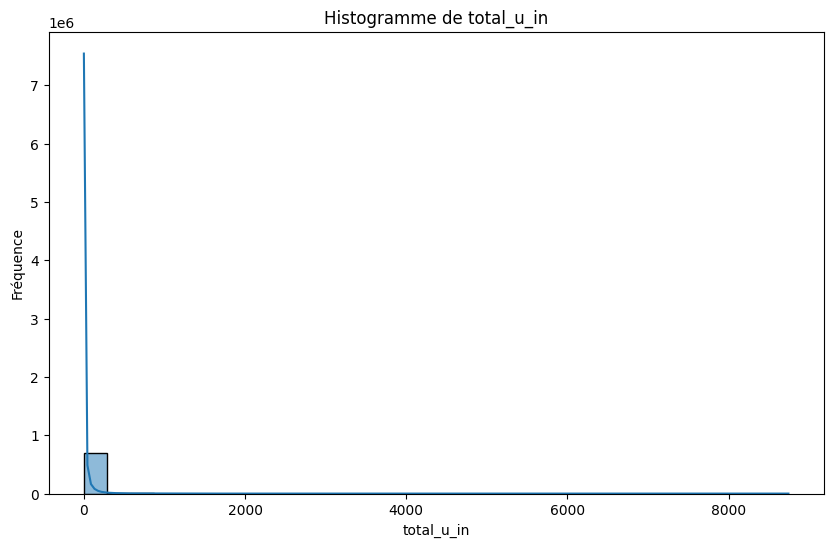

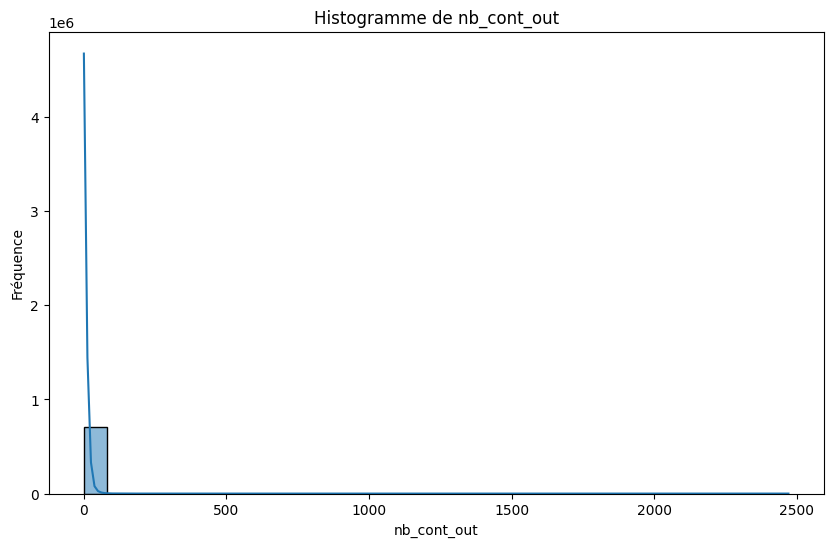

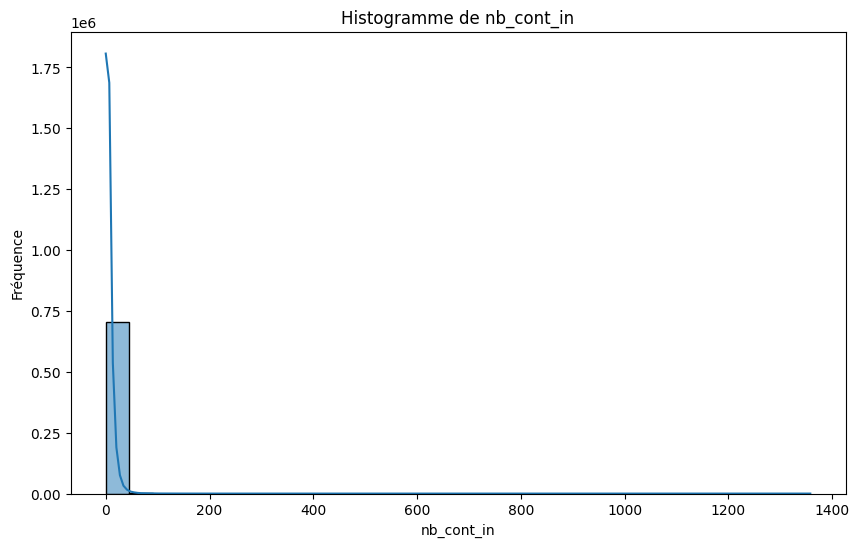

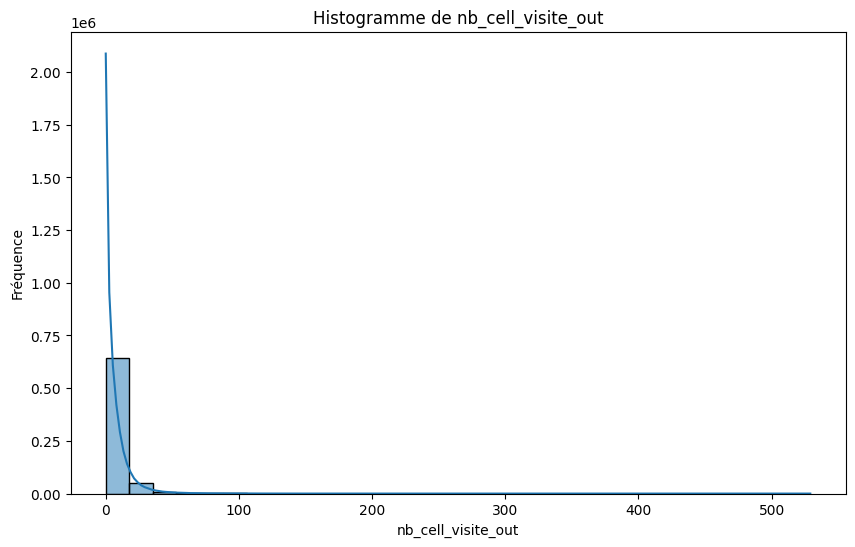

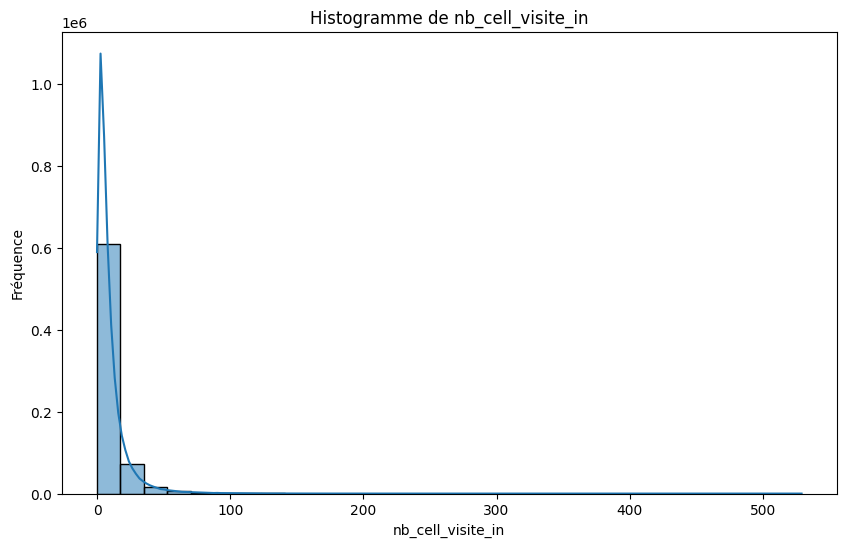

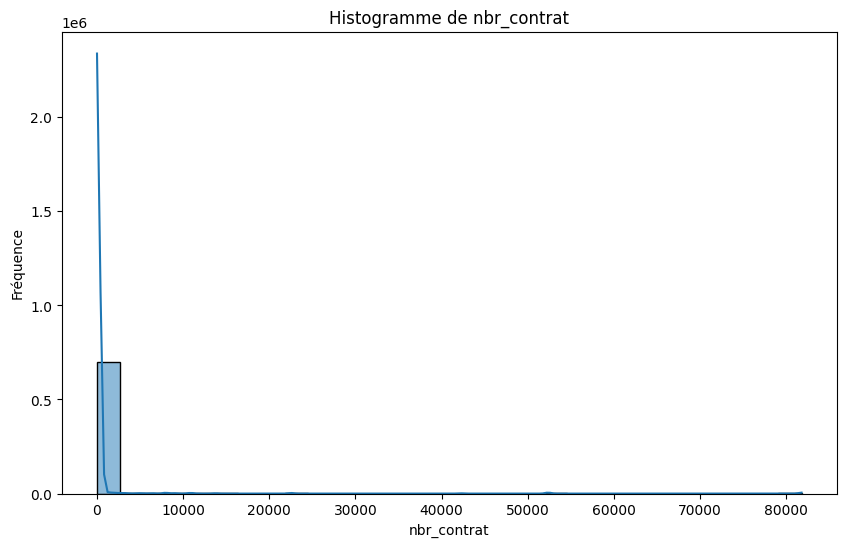

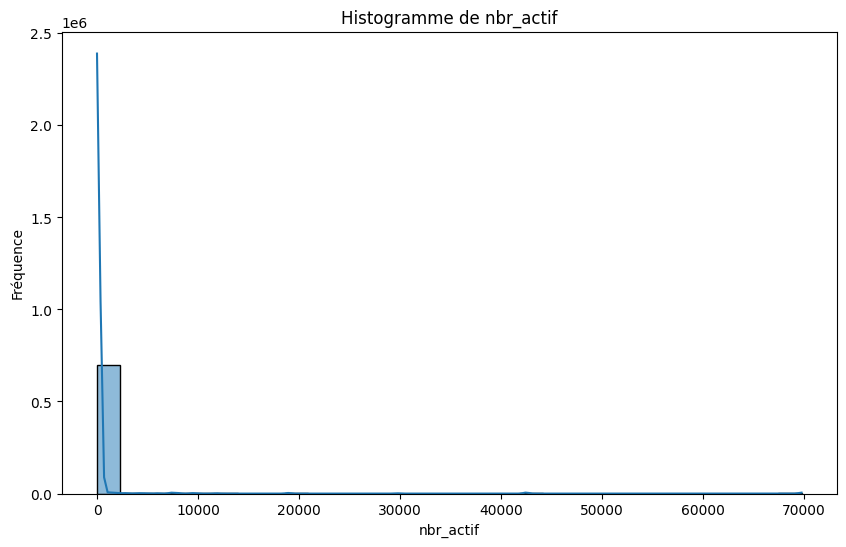

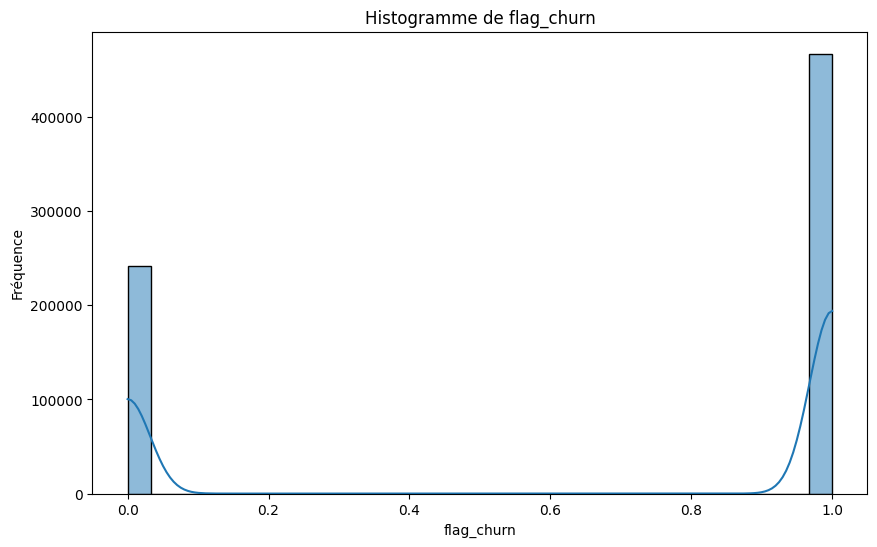

In [ ]:
def plot_individual_histograms(df):
    # Sélectionner uniquement les colonnes continues (numériques)
    df_continuous = df.select_dtypes(include=['float64', 'int64'])

    # Créer un histogramme pour chaque variable continue
    for column in df_continuous.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Histogramme de {column}')
        plt.xlabel(column)
        plt.ylabel('Fréquence')
        plt.show()

# Appeler la fonction sur votre DataFrame (data_copy par exemple)
plot_individual_histograms(data_copy)

Traitement des outliers

In [ ]:
# Fonction pour remplacer les outliers avec les bornes IQR
def cap_outliers_iqr(df, columns):
    for column in columns:
        # Calcul de Q1, Q3 et IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calcul des limites inférieure et supérieure
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remplacement des outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Appliquer la transformation aux mêmes colonnes continues
columns_continues = ['total_nb_recharge', 'total_rechage', 'total_u_data', 'total_u_out', 'total_u_in',
                      'nb_cont_out', 'nb_cont_in',
                     'nb_cell_visite_out', 'nb_cell_visite_in', 'nbr_contrat', 'nbr_actif']

# Application de la fonction de capping sur les colonnes
cap_outliers_iqr(data_copy, columns_continues)

# Vérification des statistiques après remplacement
print(data_copy[columns_continues].describe())


       total_nb_recharge  total_rechage  total_u_data    total_u_out  \
count      708904.000000  708904.000000  7.089040e+05  708904.000000   
mean            2.226743       9.208409  2.373668e+06      42.713219   
std             1.923431      11.711976  3.066338e+06      57.128844   
min             0.000000       0.000000  0.000000e+00       0.000000   
25%             1.000000       0.878000  1.027652e+04       0.000000   
50%             1.000000       3.509000  8.863698e+05      10.900000   
75%             3.000000      15.000000  3.620891e+06      75.366000   
max             6.000000      36.183000  9.036812e+06     188.415000   

          total_u_in    nb_cont_out     nb_cont_in  nb_cell_visite_out  \
count  708904.000000  708904.000000  708904.000000       708904.000000   
mean        9.925625       7.369618       6.050065            5.665824   
std        13.993021       7.315607       5.374865            6.570145   
min         0.000000       0.000000       0.000000     

In [ ]:
# Réinitialiser l'index
data_copy.reset_index(drop=True, inplace=True)

In [ ]:
data_copy.shape

(708904, 15)

In [ ]:
data_copy.to_csv("data_pour_.csv", index=False)

##1.2. Statistiques descriptives

In [ ]:
# Statistiques descriptives pour les colonnes numériques
print("Statistiques descriptives pour les colonnes numériques: ")
data_copy.describe().T

Statistiques descriptives pour les colonnes numériques: 


,count,mean,min,25%,50%,75%,max,std
activation_date,708904,2022-10-29 06:57:23.497641728,2022-07-01 00:02:37,2022-07-21 15:11:38.750000128,2022-11-12 09:10:06,2023-02-06 12:26:22.500000,2023-02-28 23:48:22,NaN
total_nb_recharge,708904.0,2.226743,0.0,1.0,1.0,3.0,6.0,1.923431
total_rechage,708904.0,9.208409,0.0,0.878,3.509,15.0,36.183,11.711976
total_u_data,708904.0,2373668.059191,0.0,10276.518799,886369.753418,3620890.698486,9036811.968018,3066338.059817
total_u_out,708904.0,42.713219,0.0,0.0,10.9,75.366,188.415,57.128844
total_u_in,708904.0,9.925625,0.0,0.0,1.883,15.383,38.4575,13.993021
nb_cont_out,708904.0,7.369618,0.0,1.0,5.0,11.0,26.0,7.315607
nb_cont_in,708904.0,6.050065,0.0,2.0,4.0,9.0,19.5,5.374865
nb_cell_visite_out,708904.0,5.665824,0.0,0.0,3.0,9.0,22.5,6.570145
nb_cell_visite_in,708904.0,8.337769,0.0,3.0,6.0,12.0,25.5,7.329644


In [ ]:
# Statistiques descriptives pour les colonnes catégorique
print("Statistiques descriptives pour les colonnes catégoriques: ")
data_copy.describe(include=['object']).T

Statistiques descriptives pour les colonnes catégoriques: 


,count,unique,top,freq
entity_code,708904,81,TRA,164181
entity_type_name,708904,11,INDIRECT,241060


## 1.3.Visualisation des distributions des variables

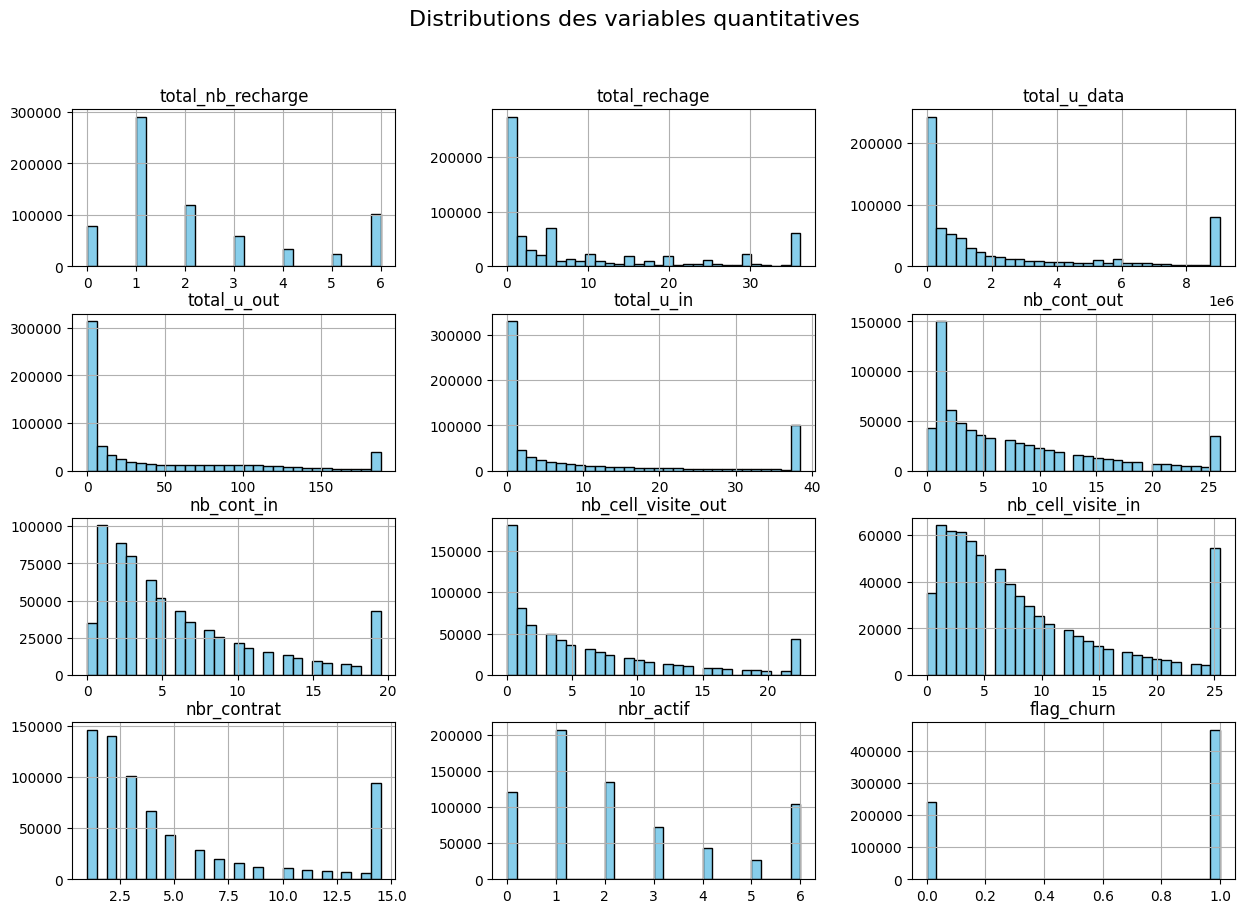

In [ ]:
#Variables quantitatives
numerical_vars = data_copy.select_dtypes(include=['float64', 'int64', 'int32']).columns

data_copy[numerical_vars].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distributions des variables quantitatives", fontsize=16)
plt.show()

**Interpretations** :

Les variables **total_nb_recharge et total_recharge** montrent une forte concentration autour des petites valeurs, avec une diminution rapide et quelques pics pour les utilisateurs avec des recharges très élevées. Cela suggère que la majorité des clients effectuent peu de recharges.


Les variables d'utilisation comme **total_u_data, total_u_out, et total_u_in** présentent une distribution asymétrique à droite, indiquant que quelques clients consomment beaucoup de données ou utilisent intensivement les services d'appel.


Les variables liées aux contacts (**nb_cont_out, nb_cont_in**) et aux visites d'antennes montrent également des distributions avec une majorité d'observations à des niveaux d'utilisation faibles ou modérés.


Les variables **nbr_contrat et nbr_actif** ont une dispersion plus importante, mais les faibles valeurs sont les plus fréquentes, reflétant un nombre réduit de contrats par client.


La variable **flag_churn** est déséquilibrée, avec une majorité de clients n'ayant pas résilié leur contrat (valeur 0).

<ipython-input-41-24e536eb59d9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')


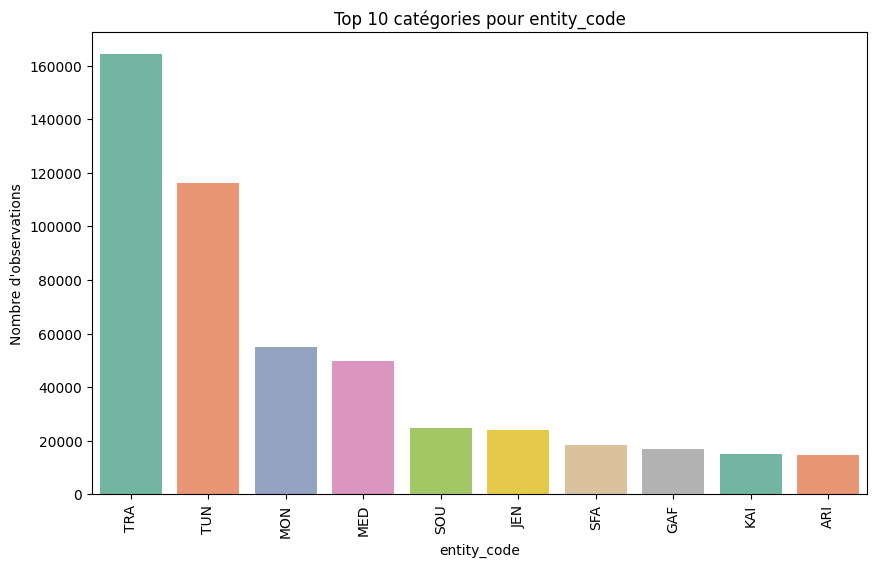

<ipython-input-41-24e536eb59d9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')


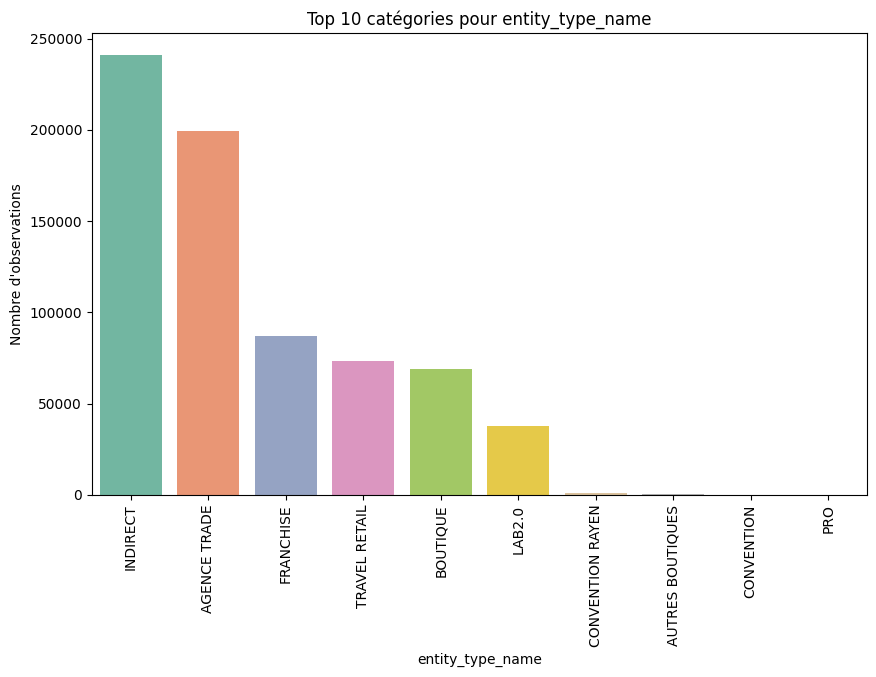

In [ ]:
#Variables qualitatives
categorical_vars = data_copy.select_dtypes(include=['object', 'category']).columns

# Limiter le nombre de catégories à afficher
for colonne in categorical_vars:
    plt.figure(figsize=(10, 6))
    # Trier par fréquence et afficher les 10 premières catégories
    top_categories = data_copy[colonne].value_counts().nlargest(10)
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set2')
    plt.title(f"Top 10 catégories pour {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Nombre d'observations")
    plt.xticks(rotation=90)  # Rotation pour lisibilité
    plt.show()

L'histogramme montre la distribution des 10 catégories les plus fréquentes pour la variable entity_code. Voici une interprétation :


La catégorie **TRA001** est de loin la plus représentée avec environ 80 000 observations, indiquant une forte concentration d'entités associées à ce code.


Les catégories suivantes, comme **MON0104 et TUNAER04**, ont des fréquences significativement plus faibles, mais restent parmi les codes les plus courants, avec environ 30 000 à 40 000 occurrences.


Les autres catégories, telles que **TUNO139 et TUNO337**, montrent des effectifs décroissants, soulignant une diversité des entités dans des proportions moindres.


Cette distribution suggère une structure asymétrique où quelques codes dominent le dataset, tandis que de nombreux autres sont moins fréquents.

Cet histogramme représente les 10 catégories les plus fréquentes pour la variable **entity_type_name**. Voici une interprétation concise :

La catégorie **INDIRECT** est largement dominante avec environ 250 000 observations, indiquant que ce type d'entité est le plus courant dans les données.


AGENCE **TRADE** est la deuxième catégorie la plus fréquente, avec un peu moins de 200 000 occurrences, représentant également une part importante.


Les catégories comme **FRANCHISE, TRAVEL RETAIL, et BOUTIQUE** montrent des fréquences décroissantes mais toujours significatives, entre 50 000 et 100 000 observations.


Les catégories **CONVENTION, AUTRES BOUTIQUES, et PRO** sont beaucoup moins représentées, suggérant des occurrences rares pour ces types d'entités.

# 2. Analyse bivariée


##2.1 Relation entre variables catégoriques

In [ ]:

from scipy.stats import chi2_contingency

#Créer un tableau de contingence entre les variables catégoriques
crosstab = pd.crosstab(data_copy['entity_type_name'], data_copy['entity_code'])
print(crosstab)

# Appliquer le test de Chi² pour évaluer la dépendance entre ces deux variables
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi² = {chi2}, p-value = {p}")

entity_code       2  47  AGP   AOU   ARI   AZU   BEA   BEJ   BEN   BIZ  ...  \
entity_type_name                                                        ...   
AGENCE TRADE      0   0    0     0  1071     0     0     0     0     0  ...   
AUTRES            0   0    0     0     0     0     0     0     0     0  ...   
AUTRES BOUTIQUES  0   0    0     0     0     0     0     0     0     0  ...   
BOUTIQUE          0   0    0     0  2850  1675     0  1331     0  2200  ...   
CONVENTION        0   0    0     0     0     0     0     0     0     0  ...   
CONVENTION RAYEN  0   0    0     0     0     0     0     0     0     0  ...   
FRANCHISE         0   0    0  1442  1246     0  1611     0     0   372  ...   
INDIRECT          8  42    0     0  9204     0     0  6244  6039  8218  ...   
LAB2.0            0   0    0     0   211     0     0     0  1543  1446  ...   
PRO               0   0   28     0     0     0     0     0     0     0  ...   
TRAVEL RETAIL     0   0    0     0     0     0     0

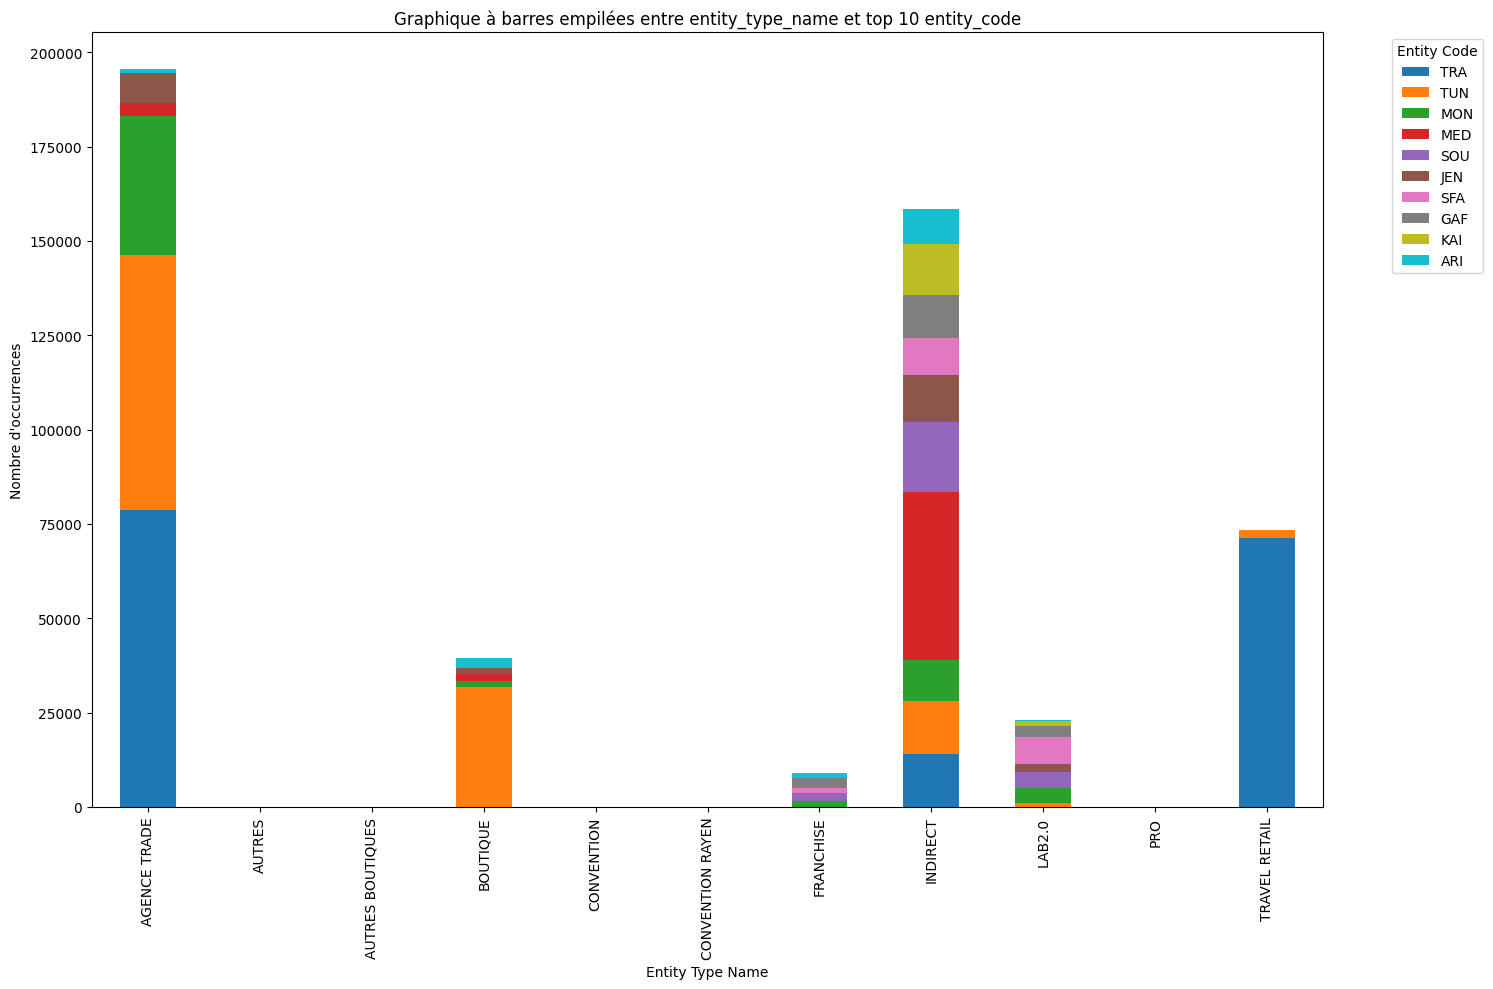

In [ ]:
# Calculer les 10 catégories les plus fréquentes dans 'entity_code' de data_copy
top_10_entity_code = data_copy['entity_code'].value_counts().head(10).index

# Créer un tableau de contingence complet entre 'entity_type_name' et 'entity_code'
crosstab_full = pd.crosstab(data_copy['entity_type_name'], data_copy['entity_code'])

# Filtrer pour ne conserver que les colonnes des 10 premières catégories
crosstab_top_10 = crosstab_full.loc[:, top_10_entity_code]

# Créer un graphique à barres empilées
crosstab_top_10.plot(kind='bar', stacked=True, figsize=(15, 10))

# Ajouter des labels et un titre
plt.title("Graphique à barres empilées entre entity_type_name et top 10 entity_code")
plt.xlabel("Entity Type Name")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=90)
plt.legend(title="Entity Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



##2.2 Relation entre une variable numérique et une variable catégorique

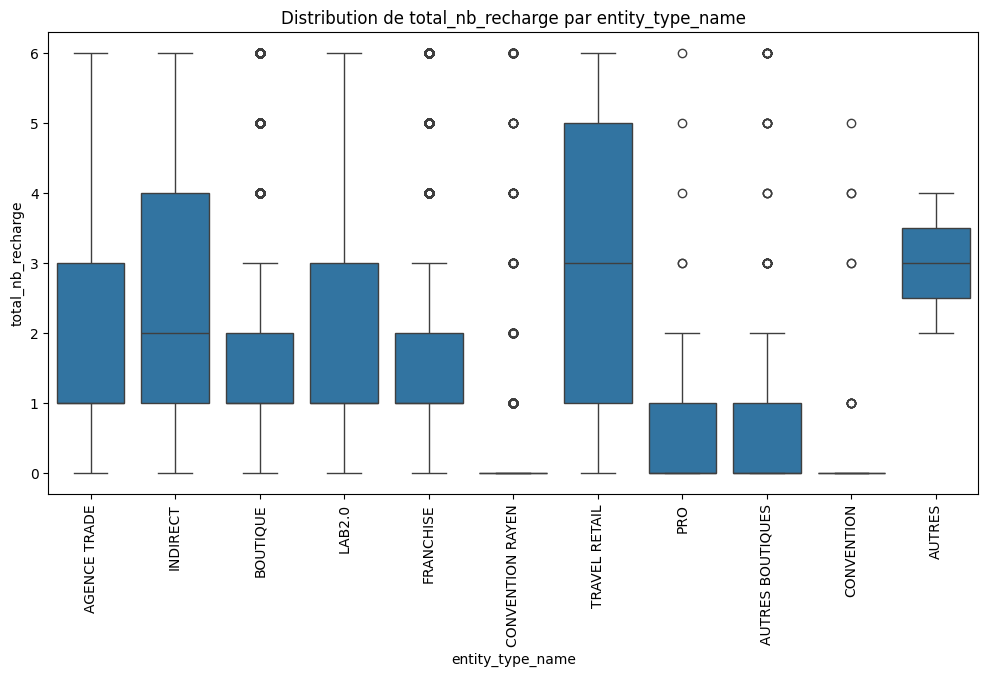

In [ ]:
# Boxplot pour observer la distribution de 'total_nb_recharge' en fonction de 'entity_type_name'
plt.figure(figsize=(12, 6))
sns.boxplot(x='entity_type_name', y='total_nb_recharge', data=data_copy)
plt.title("Distribution de total_nb_recharge par entity_type_name")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Vérifier les catégories uniques dans 'entity_type_name'
print(data_copy['entity_type_name'].unique())

# Séparer les groupes en fonction des différentes catégories de 'entity_type_name'
grouped = [data_copy[data_copy['entity_type_name'] == category]['total_nb_recharge'] for category in data_copy['entity_type_name'].unique()]

# Appliquer le test ANOVA pour comparer les moyennes de 'flag_churn' entre les groupes
f_stat, p_value = f_oneway(*grouped)

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("Il existe une différence significative entre les moyennes de total_nb_recharge pour les différents types d'entités.")
else:
    print("Il n'y a pas de différence significative entre les moyennes de total_nb_recharge pour les différents types d'entités.")

['AGENCE TRADE' 'INDIRECT' 'BOUTIQUE' 'LAB2.0' 'FRANCHISE'
 'CONVENTION RAYEN' 'TRAVEL RETAIL' 'PRO' 'AUTRES BOUTIQUES' 'CONVENTION'
 'AUTRES']
Il existe une différence significative entre les moyennes de total_nb_recharge pour les différents types d'entités.


##2.3 Relation entre deux variables numériques

In [ ]:
from scipy.stats import pearsonr

# Calculer la corrélation de Pearson entre 'total_rechage' et 'total_nb_recharge'
corr, p_value = pearsonr(data_copy['total_rechage'], data_copy['total_nb_recharge'])
print(f"Corrélation de Pearson : {corr}, p-value : {p_value}")


Corrélation de Pearson : 0.6116624609292642, p-value : 0.0


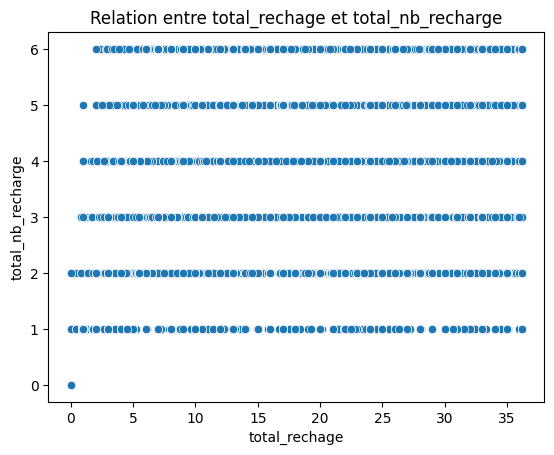

In [ ]:
# Scatter plot pour observer la relation entre 'flag_churn' et 'total_u_data'
sns.scatterplot(x='total_rechage', y='total_nb_recharge', data=data_copy)
plt.title("Relation entre total_rechage et total_nb_recharge")
plt.show()